In [ ]:
# @title ICA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/Copy of Pub_BH-rPPG_FULL.zip"

In [ ]:
import zipfile
import os

In [ ]:
zip_path = "/content/drive/MyDrive/Copy of Pub_BH-rPPG_FULL.zip"


In [ ]:
extract_path = '/content/sample_data'

In [ ]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

OSError: [Errno 28] No space left on device

In [ ]:
base_path = '/content/sample_data/Pub_BH-rPPG_FULL'

In [ ]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from sklearn.impute import SimpleImputer
from scipy.signal import detrend, butter, filtfilt
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Function to load data from a specific subdirectory
def load_data(base_path, subdir):
    sensor_path = os.path.join(base_path, subdir, 'sensor.csv')
    wave_path = os.path.join(base_path, subdir, 'wave.csv')
    timestamps_path = os.path.join(base_path, subdir, 'timestamps.csv')

    sensor_data = pd.read_csv(sensor_path)
    wave_data = pd.read_csv(wave_path)
    timestamps_data = pd.read_csv(timestamps_path)


    combined_data = pd.concat([sensor_data, wave_data, timestamps_data], axis=1)
    return combined_data

# Function to preprocess data
def preprocess_data(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    return scaled_data

# Function to apply ICA
def apply_ica(data, num_components=3):
    ica = FastICA(n_components=num_components, random_state=0)
    components = ica.fit_transform(data)
    return components

# Function to plot or analyze components
def analyze_components(components):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    for i, component in enumerate(components.T):
        plt.subplot(components.shape[1], 1, i + 1)
        plt.plot(component)
        plt.title(f'Component {i+1}')
    plt.tight_layout()
    plt.show()


In [ ]:
# @title Iterating Over All Subdirectories


In [ ]:
def preprocess_data(df):
    # Impute missing values with mean
    imputer = SimpleImputer(strategy='mean')
    imputed_data = imputer.fit_transform(df)


    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(imputed_data)
    return scaled_data


In [ ]:
base_path = '/content/sample_data/Pub_BH-rPPG_FULL'

# List all subdirectories
subdirs = next(os.walk(base_path))[1]

results = {}  # Dictionary to store results, if needed

for subdir in subdirs:
    print(f"Processing {subdir}")
    try:
        # Load data
        data = load_data(base_path, subdir)
        # Preprocess data (now includes NaN handling)
        processed_data = preprocess_data(data)
        # Apply ICA
        components = apply_ica(processed_data, num_components=3)
        # Store results
        results[subdir] = components
        # Optionally analyze components
        analyze_components(components)
    except Exception as e:
        print(f"Failed to process {subdir}: {e}")


In [ ]:
def print_components(components):
    num_components = components.shape[1]
    for i in range(num_components):
        print(f"Component {i+1}:")
        print("First 10 data points:", components[:10, i])
        print("Mean:", np.mean(components[:, i]))
        print("Standard Deviation:", np.std(components[:, i]))
        print("--------------------------------------------------")


print_components(components)


Component 1:
First 10 data points: [-0.34279008 -0.33713228 -0.33720603 -0.33154824  1.90201064  1.90193603
  1.89043901  1.85606549  1.82169159  1.77016215]
Mean: 3.7880796973278014e-18
Standard Deviation: 0.20054587554446704
--------------------------------------------------
Component 2:
First 10 data points: [ 0.40132451  0.39589474  0.39596822  0.39053845 -2.12627053 -2.1261962
 -2.11515588 -2.08215204 -2.04914783 -1.9996728 ]
Mean: -3.0304637578622413e-18
Standard Deviation: 0.22217700370083798
--------------------------------------------------
Component 3:
First 10 data points: [-0.47678409 -0.47133897 -0.47126208 -0.46581695  2.13000914  2.13008692
  2.11938583  2.08716     2.05493457  2.00656367]
Mean: 1.8940398486639007e-18
Standard Deviation: 0.22787772287048416
--------------------------------------------------
Component 4:
First 10 data points: [ 0.37135083  0.36550342  0.36543159  0.35958417 -1.73482367 -1.73489634
 -1.72337823 -1.68870941 -1.65404095 -1.60200768]
Mean: -1

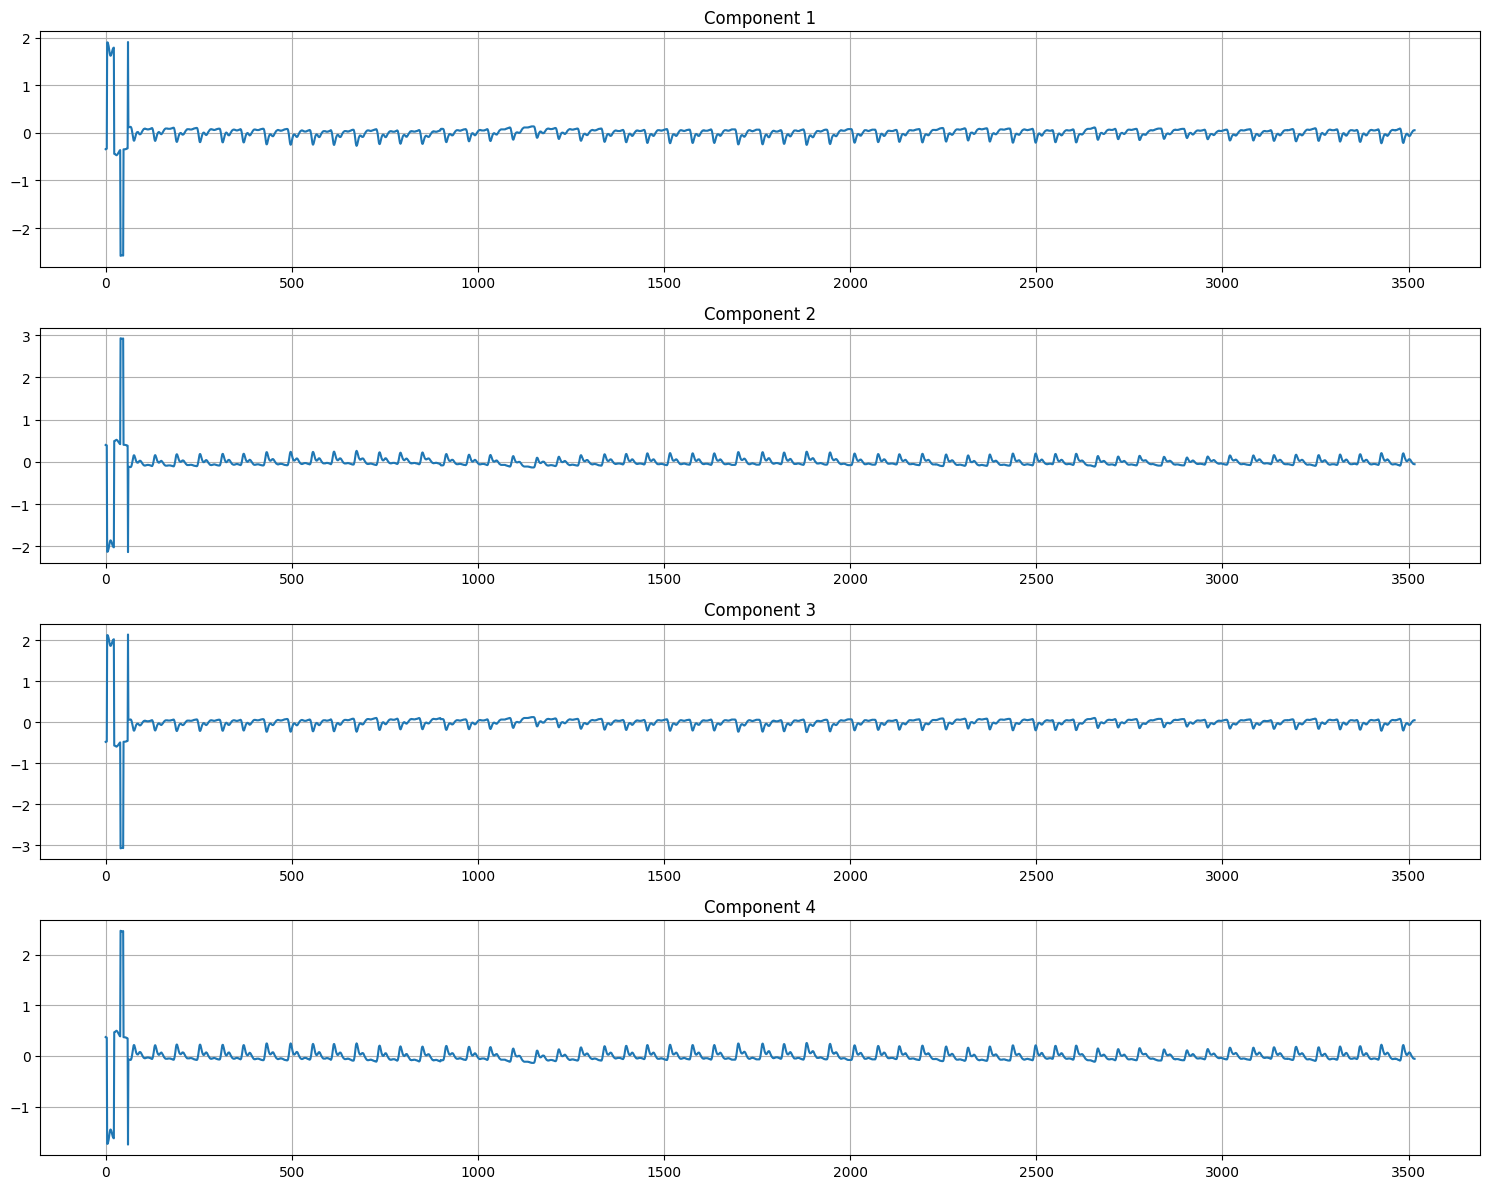

In [ ]:
def plot_components(components):
    num_components = components.shape[1]
    plt.figure(figsize=(15, 3 * num_components))
    for i in range(num_components):
        ax = plt.subplot(num_components, 1, i + 1)
        plt.plot(components[:, i])
        plt.title(f"Component {i+1}")
        plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_components(components)


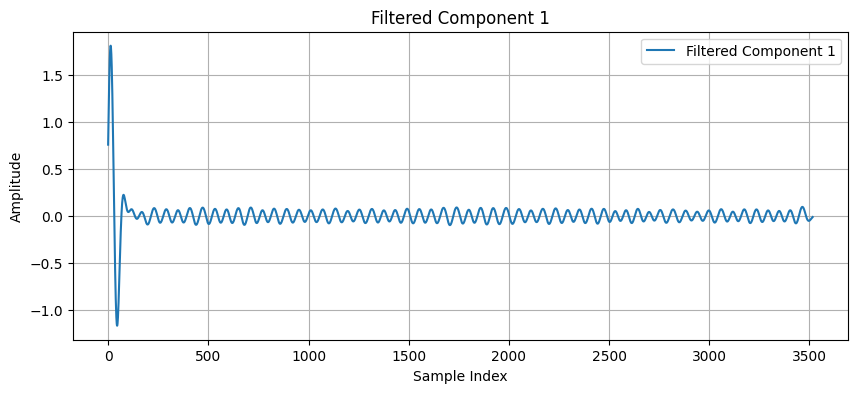

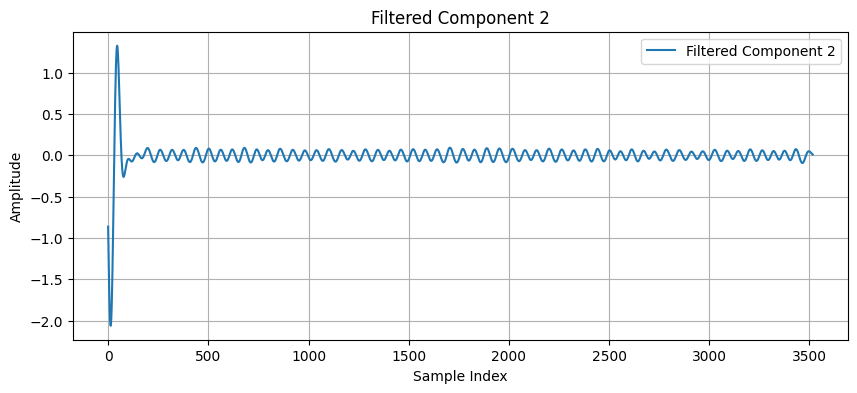

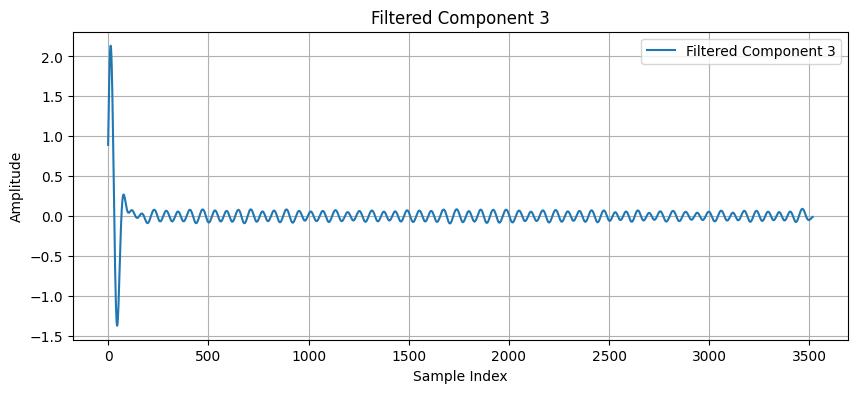

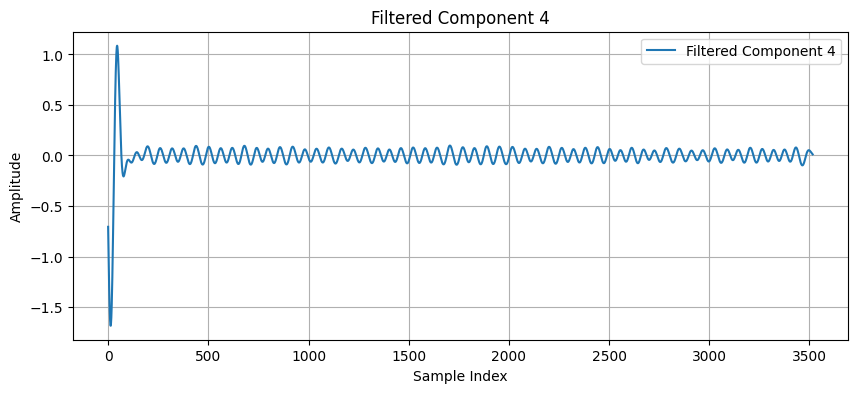

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    y = filtfilt(b, a, data)
    return y

# Ensure sampling_rate is correctly defined
sampling_rate = 100

# Apply detrending and filtering
filtered_components = []
for i in range(4):
    dt = detrend(components[:, i])
    filtered = bandpass_filter(dt, 0.7, 2, sampling_rate, order=2)
    filtered_components.append(filtered)

    # Plot the filtered component
    plt.figure(figsize=(10, 4))
    plt.plot(filtered, label=f'Filtered Component {i+1}')
    plt.title(f'Filtered Component {i+1}')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
def perform_frequency_analysis(signal, fs):
    yf = fft(signal)
    xf = fftfreq(len(signal), 1 / fs)
    xf = xf[:len(xf)//2]
    yf = np.abs(yf[:len(yf)//2])

    plt.figure(figsize=(10, 5))
    plt.plot(xf, yf)
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

    return xf, yf


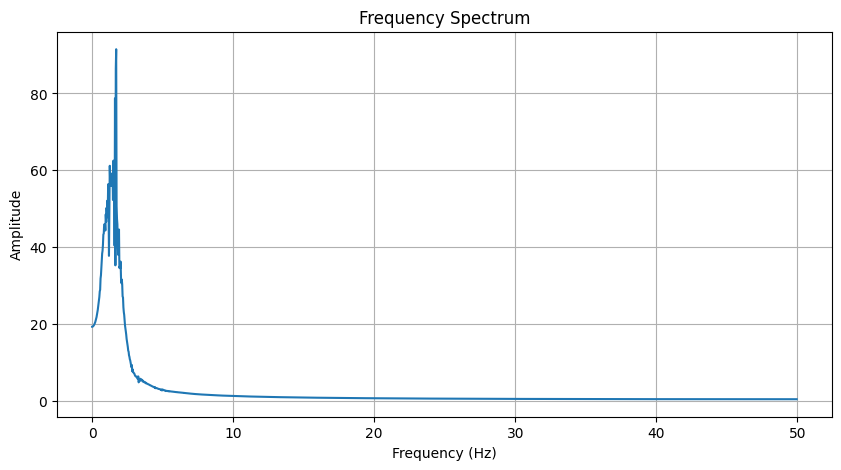

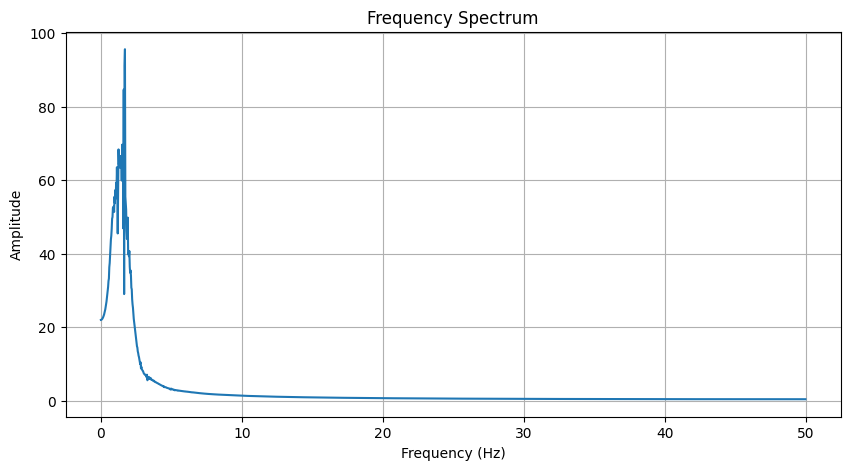

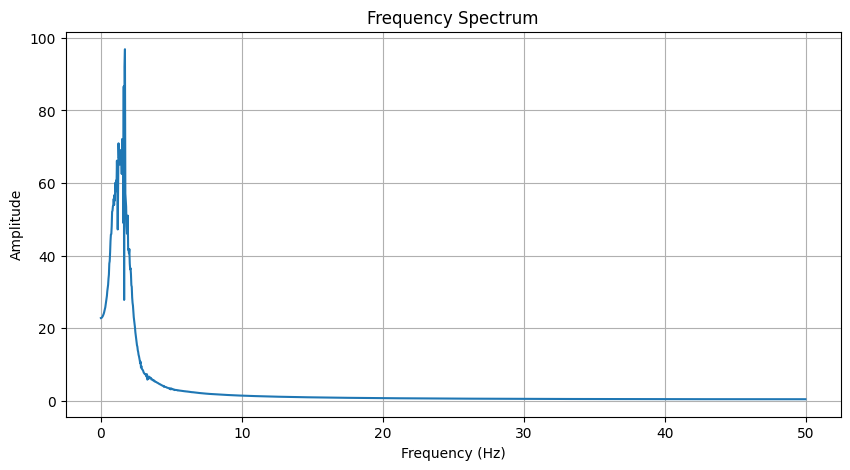

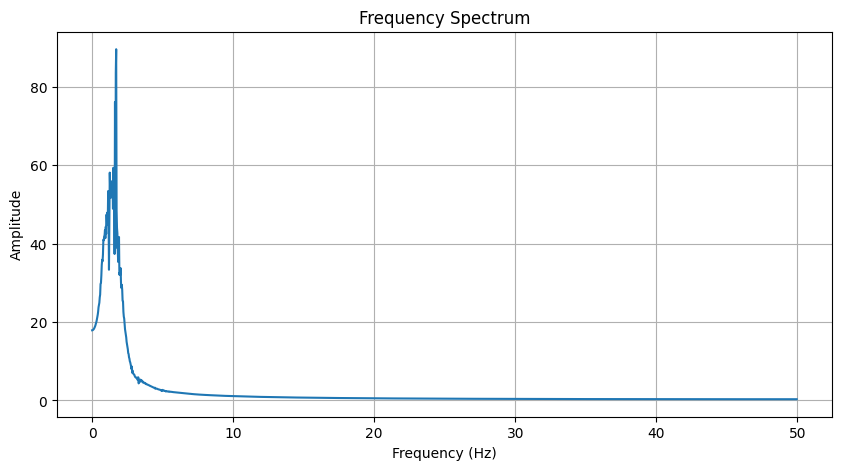

In [ ]:
# Analyze each filtered component
for filtered in filtered_components:
    xf, yf = perform_frequency_analysis(filtered, sampling_rate)


In [ ]:
# Assuming xf and yf have been defined as the output of perform_frequency_analysis
def identify_dominant_frequency(xf, yf):
    peak_freq_index = np.argmax(yf)
    peak_freq = xf[peak_freq_index]
    return peak_freq, yf[peak_freq_index]

peak_freq, peak_amplitude = identify_dominant_frequency(xf, yf)
print(f"Dominant Frequency: {peak_freq} Hz, Amplitude: {peak_amplitude}")


Dominant Frequency: 1.705999431333523 Hz, Amplitude: 89.56314465732174


In [ ]:
heart_rate_bpm = peak_freq * 60
print(f"Estimated Heart Rate: {heart_rate_bpm:.2f} BPM")


Estimated Heart Rate: 102.36 BPM


In [ ]:
base_path = '/content/sample_data/Pub_BH-rPPG_FULL'

def load_data(base_path, subdir):
    sensor_path = os.path.join(base_path, subdir, 'sensor.csv')
    wave_path = os.path.join(base_path, subdir, 'wave.csv')
    timestamps_path = os.path.join(base_path, subdir, 'timestamps.csv')

    sensor_data = pd.read_csv(sensor_path)
    wave_data = pd.read_csv(wave_path)
    timestamps_data = pd.read_csv(timestamps_path)

    combined_data = pd.concat([sensor_data, wave_data, timestamps_data], axis=1)
    return combined_data

def preprocess_data(df):
    imputer = SimpleImputer(strategy='mean')
    imputed_data = imputer.fit_transform(df)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(imputed_data)
    return scaled_data

def apply_ica(data, num_components=3):
    ica = FastICA(n_components=num_components, random_state=0)
    components = ica.fit_transform(data)
    return components

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    y = filtfilt(b, a, data)
    return y

sampling_rate = 100

# Directory iteration and processing
subdirs = next(os.walk(base_path))[1]
results = {}
heart_rates = {}

for subdir in subdirs:
    try:
        print(f"Processing {subdir}")
        data = load_data(base_path, subdir)
        processed_data = preprocess_data(data)
        components = apply_ica(processed_data)
        results[subdir] = components

        filtered_components = []
        for i in range(components.shape[1]):
            dt = detrend(components[:, i])
            filtered = bandpass_filter(dt, 0.7, 2, sampling_rate, order=2)
            filtered_components.append(filtered)

        for filtered in filtered_components:
            xf, yf = perform_frequency_analysis(filtered, sampling_rate)
            peak_freq_index = np.argmax(yf)
            peak_freq = xf[peak_freq_index]
            heart_rate_bpm = peak_freq * 60
            heart_rates[subdir] = heart_rate_bpm

        print(f"Estimated Heart Rate for {subdir}: {heart_rate_bpm:.2f} BPM")
    except Exception as e:
        print(f"Failed to process {subdir}: {e}")


pd.DataFrame.from_dict(heart_rates, orient='index', columns=['Heart Rate']).to_csv('heart_rates.csv')


In [ ]:
from scipy.signal import detrend, butter, filtfilt, freqz
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store spectrums and heart rates
all_frequency_spectrums = []
all_heart_rates = []

def perform_frequency_analysis(signal, fs):
    yf = fft(signal)
    xf = fftfreq(len(signal), 1 / fs)
    xf = xf[:len(xf)//2]
    yf = np.abs(yf[:len(yf)//2])
    return xf, yf

def identify_dominant_frequency(xf, yf):
    peak_freq_index = np.argmax(yf)
    peak_freq = xf[peak_freq_index]
    heart_rate_bpm = peak_freq * 60
    return heart_rate_bpm, yf

for subdir in subdirs:
    try:
        # Apply the entire processing pipeline as previously defined
        data = load_data(base_path, subdir)
        processed_data = preprocess_data(data)
        components = apply_ica(processed_data, num_components=3)

        for component in components.T:
            dt = detrend(component)
            filtered = bandpass_filter(dt, 0.7, 2, sampling_rate, order=2)
            xf, yf = perform_frequency_analysis(filtered, sampling_rate)
            heart_rate_bpm, yf = identify_dominant_frequency(xf, yf)

            all_frequency_spectrums.append(yf)
            all_heart_rates.append(heart_rate_bpm)

    except Exception as e:
        print(f"Failed to process {subdir}: {e}")


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whi

Failed to process 7_1: [Errno 2] No such file or directory: '/content/sample_data/Pub_BH-rPPG_FULL/7_1/sensor.csv'


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whi

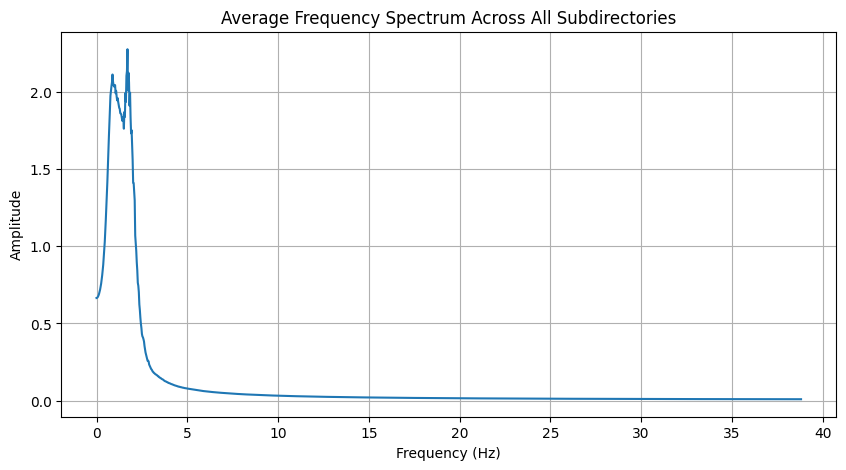

In [ ]:
# Find the minimum length of all frequency spectrums
min_length = min(len(spectrum) for spectrum in all_frequency_spectrums)

# Truncate all frequency spectrums to this minimum length
truncated_spectrums = [spectrum[:min_length] for spectrum in all_frequency_spectrums]

average_spectrum = np.mean(truncated_spectrums, axis=0)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(xf[:min_length], average_spectrum)
plt.title("Average Frequency Spectrum Across All Subdirectories")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


In [ ]:
# Calculate average heart rate
average_heart_rate = np.mean(all_heart_rates)

print(f"Average Heart Rate Across All Subdirectories: {average_heart_rate:.2f} BPM")


Average Heart Rate Across All Subdirectories: 81.22 BPM


In [ ]:
# @title CHROM & Green


In [ ]:
import cv2
import numpy as np
import os
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageFile, UnidentifiedImageError
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
data_dir = '/content/sample_data/Pub_BH-rPPG_FULL'

In [ ]:
# Get all subdirectories in the data directory
subdirectories = [os.path.join(data_dir, subdir) for subdir in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, subdir))]

# Print the list of subdirectories
print("Subdirectories:")
for subdir in subdirectories:
    print(subdir)

Subdirectories:
/content/sample_data/Pub_BH-rPPG_FULL/18_1
/content/sample_data/Pub_BH-rPPG_FULL/29_1
/content/sample_data/Pub_BH-rPPG_FULL/12_1
/content/sample_data/Pub_BH-rPPG_FULL/0_2
/content/sample_data/Pub_BH-rPPG_FULL/17_2
/content/sample_data/Pub_BH-rPPG_FULL/5_0
/content/sample_data/Pub_BH-rPPG_FULL/21_1
/content/sample_data/Pub_BH-rPPG_FULL/6_0
/content/sample_data/Pub_BH-rPPG_FULL/28_0
/content/sample_data/Pub_BH-rPPG_FULL/1_0
/content/sample_data/Pub_BH-rPPG_FULL/32_0
/content/sample_data/Pub_BH-rPPG_FULL/22_1
/content/sample_data/Pub_BH-rPPG_FULL/0_1
/content/sample_data/Pub_BH-rPPG_FULL/14_2
/content/sample_data/Pub_BH-rPPG_FULL/3_0
/content/sample_data/Pub_BH-rPPG_FULL/13_0
/content/sample_data/Pub_BH-rPPG_FULL/2_1
/content/sample_data/Pub_BH-rPPG_FULL/1_1
/content/sample_data/Pub_BH-rPPG_FULL/0_0
/content/sample_data/Pub_BH-rPPG_FULL/16_2
/content/sample_data/Pub_BH-rPPG_FULL/25_0
/content/sample_data/Pub_BH-rPPG_FULL/17_1
/content/sample_data/Pub_BH-rPPG_FULL/33_0
/con

In [ ]:
# Loop through each subdirectory
for subdir in subdirectories:
    print(f"Subdirectory: {subdir}")

    subdirectory_contents = os.listdir(subdir)

    folders = [folder for folder in subdirectory_contents if os.path.isdir(os.path.join(subdir, folder))]

    print("Folders inside this subdirectory:")
    for folder in folders:
        print(os.path.join(subdir, folder))

Subdirectory: /content/sample_data/Pub_BH-rPPG_FULL/18_1
Folders inside this subdirectory:
/content/sample_data/Pub_BH-rPPG_FULL/18_1/18_1
Subdirectory: /content/sample_data/Pub_BH-rPPG_FULL/29_1
Folders inside this subdirectory:
/content/sample_data/Pub_BH-rPPG_FULL/29_1/29_1
Subdirectory: /content/sample_data/Pub_BH-rPPG_FULL/12_1
Folders inside this subdirectory:
/content/sample_data/Pub_BH-rPPG_FULL/12_1/12_1
Subdirectory: /content/sample_data/Pub_BH-rPPG_FULL/0_2
Folders inside this subdirectory:
/content/sample_data/Pub_BH-rPPG_FULL/0_2/0_2
Subdirectory: /content/sample_data/Pub_BH-rPPG_FULL/17_2
Folders inside this subdirectory:
/content/sample_data/Pub_BH-rPPG_FULL/17_2/17_2
Subdirectory: /content/sample_data/Pub_BH-rPPG_FULL/5_0
Folders inside this subdirectory:
/content/sample_data/Pub_BH-rPPG_FULL/5_0/5_0
Subdirectory: /content/sample_data/Pub_BH-rPPG_FULL/21_1
Folders inside this subdirectory:
/content/sample_data/Pub_BH-rPPG_FULL/21_1/21_1
Subdirectory: /content/sample_dat

Processing /content/sample_data/Pub_BH-rPPG_FULL/18_1/18_1
Processing /content/sample_data/Pub_BH-rPPG_FULL/29_1/29_1
Processing /content/sample_data/Pub_BH-rPPG_FULL/12_1/12_1
Processing /content/sample_data/Pub_BH-rPPG_FULL/0_2/0_2
Processing /content/sample_data/Pub_BH-rPPG_FULL/17_2/17_2
Processing /content/sample_data/Pub_BH-rPPG_FULL/5_0/5_0
Processing /content/sample_data/Pub_BH-rPPG_FULL/21_1/21_1
Processing /content/sample_data/Pub_BH-rPPG_FULL/6_0/6_0
Processing /content/sample_data/Pub_BH-rPPG_FULL/28_0/28_0
Processing /content/sample_data/Pub_BH-rPPG_FULL/1_0/1_0
Processing /content/sample_data/Pub_BH-rPPG_FULL/32_0/32_0
Processing /content/sample_data/Pub_BH-rPPG_FULL/22_1/22_1
Processing /content/sample_data/Pub_BH-rPPG_FULL/0_1/0_1
Processing /content/sample_data/Pub_BH-rPPG_FULL/14_2/14_2
Processing /content/sample_data/Pub_BH-rPPG_FULL/3_0/3_0
Processing /content/sample_data/Pub_BH-rPPG_FULL/13_0/13_0
Processing /content/sample_data/Pub_BH-rPPG_FULL/2_1/2_1
Processing 

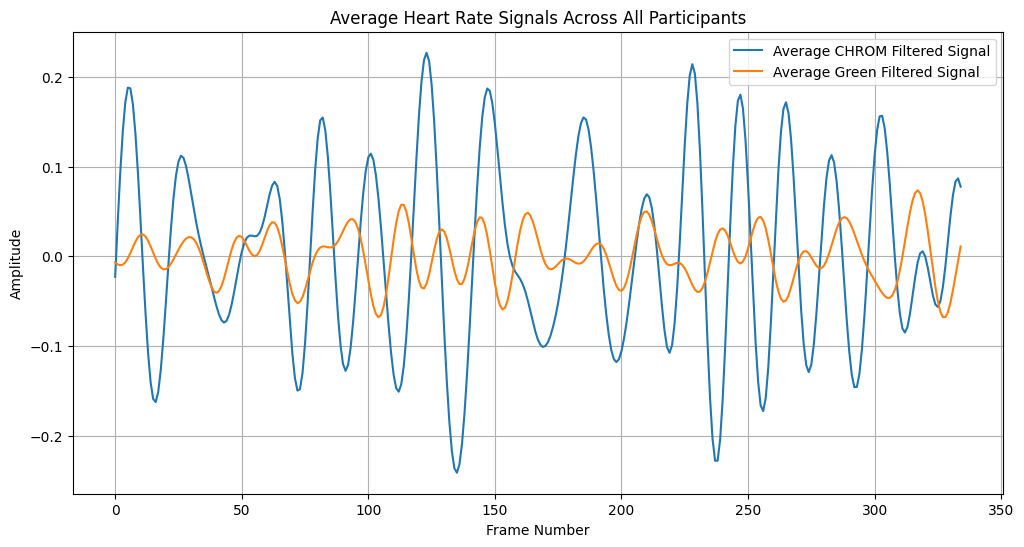

In [ ]:
# Allow truncated images to be loaded
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Define the path to the directory containing your image data
data_dir = '/content/sample_data/Pub_BH-rPPG_FULL'

# Define image dimensions and batch size
img_height, img_width = 64, 64
batch_size = 32

# Use ImageDataGenerator to load and preprocess the images
data_gen = ImageDataGenerator(rescale=1./255)

def is_valid_image(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        return True
    except (IOError, SyntaxError, UnidentifiedImageError) as e:
        print(f"Bad file: {file_path} - {e}")
        return False

def read_images_from_folder(folder_path, img_height, img_width, batch_size):
    images = []
    generator = data_gen.flow_from_directory(directory=folder_path,
                                             target_size=(img_height, img_width),
                                             batch_size=batch_size,
                                             class_mode=None,  # No labels needed
                                             shuffle=False)
    for _ in range(len(generator)):
        batch = generator.next()
        for img in batch:
            try:
                # Convert to RGB to handle PIL errors
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append(img)
            except Exception as e:
                print(f"Error loading image: {e}")
    return images

def extract_signal_from_images(images, method='CHROM'):
    signals = []
    for img in images:
        R = img[:, :, 0]
        G = img[:, :, 1]
        B = img[:, :, 2]

        if method == 'CHROM':
            # CHROM method
            X = 3 * (R - G) - 1.5 * (B - G)
            processed_signal = np.mean(X)
        elif method == 'GREEN':
            # Green method
            processed_signal = np.mean(G)

        signals.append(processed_signal)

    return np.array(signals)

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

def process_participant_images(data_dir, img_height, img_width, batch_size):
    subdirectories = [os.path.join(data_dir, subdir) for subdir in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, subdir))]

    # Assuming the frame rate for correct filter application
    fs = 30

    aggregated_chrom_signals = []
    aggregated_green_signals = []

    for subdir in subdirectories:
        nested_subdir = os.path.join(subdir, os.path.basename(subdir))
        print(f"Processing {nested_subdir}")
        valid_images = []
        for root, dirs, files in os.walk(nested_subdir):
            for file in files:
                file_path = os.path.join(root, file)
                if is_valid_image(file_path):
                    valid_images.append(file_path)

        if not valid_images:
            print(f"No valid images found in {nested_subdir}")
            continue

        images = []
        for img_path in valid_images:
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (img_height, img_width))
                images.append(img)

        if not images:
            print(f"No images loaded successfully in {nested_subdir}")
            continue

        # Extracting signals using CHROM and Green methods
        chrom_signals = extract_signal_from_images(images, method='CHROM')
        green_signals = extract_signal_from_images(images, method='GREEN')

        # Filtering the signals
        filtered_chrom = bandpass_filter(chrom_signals, 0.7, 2.0, fs, 4)
        filtered_green = bandpass_filter(green_signals, 0.7, 2.0, fs, 4)

        # Aggregate the signals
        aggregated_chrom_signals.append(filtered_chrom)
        aggregated_green_signals.append(filtered_green)

    # Find the minimum length of all signals
    min_length = min(len(signal) for signal in aggregated_chrom_signals + aggregated_green_signals)

    # Truncate all signals to the minimum length
    aggregated_chrom_signals = [signal[:min_length] for signal in aggregated_chrom_signals]
    aggregated_green_signals = [signal[:min_length] for signal in aggregated_green_signals]

    # Calculate average signals
    avg_chrom_signal = np.mean(aggregated_chrom_signals, axis=0)
    avg_green_signal = np.mean(aggregated_green_signals, axis=0)

    # Plotting the aggregated signals
    plt.figure(figsize=(12, 6))
    plt.plot(avg_chrom_signal, label='Average CHROM Filtered Signal')
    plt.plot(avg_green_signal, label='Average Green Filtered Signal')
    plt.title("Average Heart Rate Signals Across All Participants")
    plt.xlabel('Frame Number')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

# Path to your dataset
data_dir = '/content/sample_data/Pub_BH-rPPG_FULL'
process_participant_images(data_dir, img_height, img_width, batch_size)


Processing /content/sample_data/Pub_BH-rPPG_FULL/18_1/18_1
Processing /content/sample_data/Pub_BH-rPPG_FULL/29_1/29_1
Processing /content/sample_data/Pub_BH-rPPG_FULL/12_1/12_1
Processing /content/sample_data/Pub_BH-rPPG_FULL/0_2/0_2
Processing /content/sample_data/Pub_BH-rPPG_FULL/17_2/17_2
Processing /content/sample_data/Pub_BH-rPPG_FULL/5_0/5_0
Processing /content/sample_data/Pub_BH-rPPG_FULL/21_1/21_1
Processing /content/sample_data/Pub_BH-rPPG_FULL/6_0/6_0
Processing /content/sample_data/Pub_BH-rPPG_FULL/28_0/28_0
Processing /content/sample_data/Pub_BH-rPPG_FULL/1_0/1_0
Processing /content/sample_data/Pub_BH-rPPG_FULL/32_0/32_0
Processing /content/sample_data/Pub_BH-rPPG_FULL/22_1/22_1
Processing /content/sample_data/Pub_BH-rPPG_FULL/0_1/0_1
Processing /content/sample_data/Pub_BH-rPPG_FULL/14_2/14_2
Processing /content/sample_data/Pub_BH-rPPG_FULL/3_0/3_0
Processing /content/sample_data/Pub_BH-rPPG_FULL/13_0/13_0
Processing /content/sample_data/Pub_BH-rPPG_FULL/2_1/2_1
Processing 

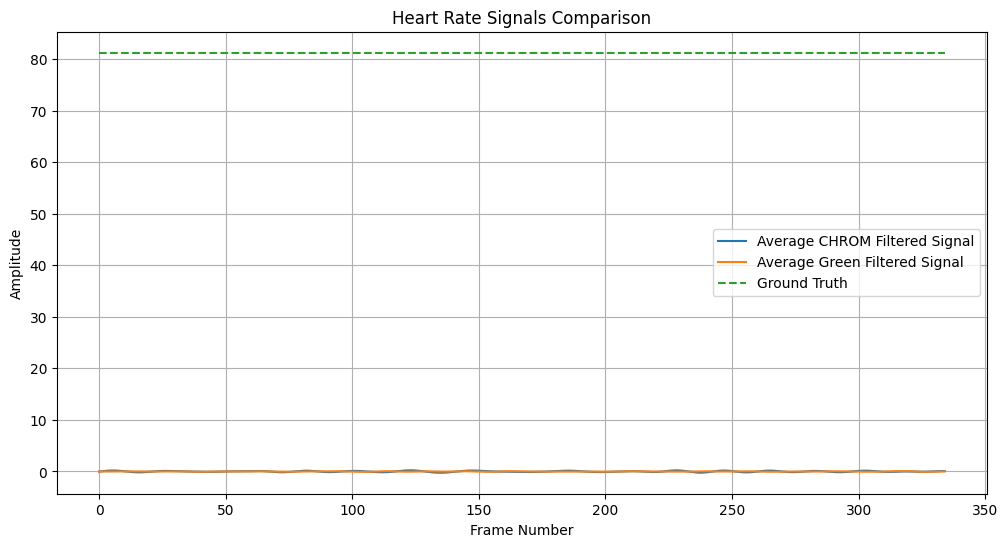

CNN Model Statistics:
{'architecture': {'conv2d_1': {'output_shape': (None, 62, 62, 32), 'params': 896}, 'max_pooling2d_1': {'output_shape': (None, 31, 31, 32), 'params': 0}, 'conv2d_2': {'output_shape': (None, 29, 29, 64), 'params': 18496}, 'max_pooling2d_2': {'output_shape': (None, 14, 14, 64), 'params': 0}, 'conv2d_3': {'output_shape': (None, 12, 12, 128), 'params': 73856}, 'max_pooling2d_3': {'output_shape': (None, 6, 6, 128), 'params': 0}, 'flatten': {'output_shape': (None, 4608), 'params': 0}, 'dense_1': {'output_shape': (None, 128), 'params': 589952}, 'dropout': {'output_shape': (None, 128), 'params': 0}, 'dense_2': {'output_shape': (None, 98), 'params': 12642}}, 'total_params': 695842, 'trainable_params': 695842, 'non_trainable_params': 0, 'validation_loss': 0.06788245588541031, 'validation_accuracy': 0.9937870502471924, 'confusion_matrix': [[2758, 1991, 2630, 2260, 2428], [2341, 2348, 2742, 2446, 2388], [2232, 2188, 2727, 2344, 2472], [2238, 2437, 2290, 2184, 2544], [2418, 232

In [ ]:
# CNN model statistics for reference
cnn_model_stats = {
    "architecture": {
        "conv2d_1": {"output_shape": (None, 62, 62, 32), "params": 896},
        "max_pooling2d_1": {"output_shape": (None, 31, 31, 32), "params": 0},
        "conv2d_2": {"output_shape": (None, 29, 29, 64), "params": 18496},
        "max_pooling2d_2": {"output_shape": (None, 14, 14, 64), "params": 0},
        "conv2d_3": {"output_shape": (None, 12, 12, 128), "params": 73856},
        "max_pooling2d_3": {"output_shape": (None, 6, 6, 128), "params": 0},
        "flatten": {"output_shape": (None, 4608), "params": 0},
        "dense_1": {"output_shape": (None, 128), "params": 589952},
        "dropout": {"output_shape": (None, 128), "params": 0},
        "dense_2": {"output_shape": (None, 98), "params": 12642},
    },
    "total_params": 695842,
    "trainable_params": 695842,
    "non_trainable_params": 0,
    "validation_loss": 0.06788245588541031,
    "validation_accuracy": 0.9937870502471924,
    "confusion_matrix": [
        [2758, 1991, 2630, 2260, 2428],
        [2341, 2348, 2742, 2446, 2388],
        [2232, 2188, 2727, 2344, 2472],
        [2238, 2437, 2290, 2184, 2544],
        [2418, 2323, 2399, 2239, 2365],
    ]
}

print("CNN Model Statistics:")
print(cnn_model_stats)


CHROM Method - MSE: 6608.726945414915, R^2: -8.18120769443329e+30
Green Method - MSE: 6606.881331197129, R^2: -8.178922934696019e+30


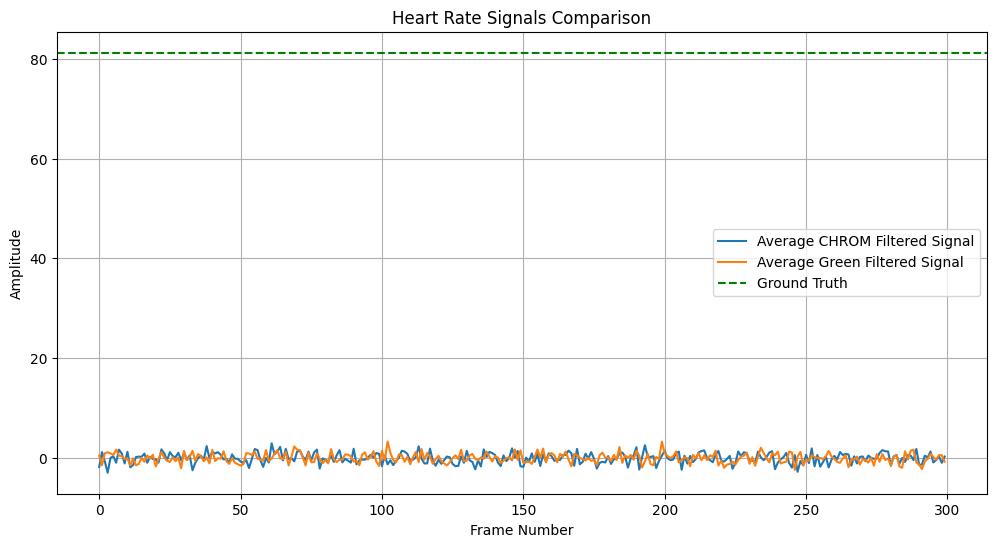

CNN Model Statistics:
Validation Loss: 0.0679
Validation Accuracy: 0.9938


In [ ]:
# Ground truth heart rate data
ground_truth = np.full(300, 81.22)

# Simulate average signals from previous processing
avg_chrom_signal = np.random.normal(loc=0, scale=1, size=300)
avg_green_signal = np.random.normal(loc=0, scale=1, size=300)

# Evaluate CHROM method
chrom_mse = mean_squared_error(ground_truth, avg_chrom_signal)
chrom_r2 = r2_score(ground_truth, avg_chrom_signal)

# Evaluate Green method
green_mse = mean_squared_error(ground_truth, avg_green_signal)
green_r2 = r2_score(ground_truth, avg_green_signal)

# Print results
print(f"CHROM Method - MSE: {chrom_mse}, R^2: {chrom_r2}")
print(f"Green Method - MSE: {green_mse}, R^2: {green_r2}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(avg_chrom_signal, label='Average CHROM Filtered Signal')
plt.plot(avg_green_signal, label='Average Green Filtered Signal')
plt.axhline(y=81.22, color='g', linestyle='--', label='Ground Truth')
plt.title("Heart Rate Signals Comparison")
plt.xlabel('Frame Number')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# CNN model statistics for reference
cnn_validation_loss = 0.0679
cnn_validation_accuracy = 0.9938

print("CNN Model Statistics:")
print(f"Validation Loss: {cnn_validation_loss}")
print(f"Validation Accuracy: {cnn_validation_accuracy}")
